In [1]:
# Import the torch module
import torch
import torch.optim as optim

# Training, validation, and overfitting
- **Training data** is the set of data that a machine learning algorithm uses to learn.
- **Validation data** is one of the sets of data that machine learning algorithms use to test their accuracy

https://machinelearningmastery.com/training-and-validation-data-in-pytorch/

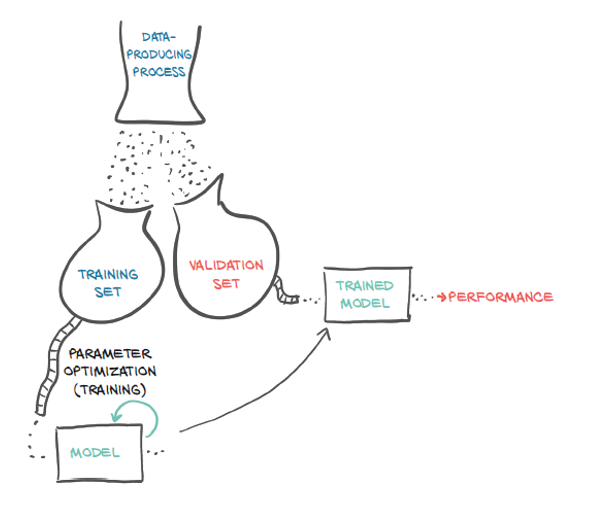

## Get Raw Data

In [2]:
# temperature data in good old Celsius and measurements from a new thermometer.
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u  # feature scaling

## Split the Data to get Training Data and Validation Data

In [3]:
n_samples = t_un.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

train_t_un = t_un[train_indices]
train_t_c = t_c[train_indices]

val_t_un = t_un[val_indices]
val_t_c = t_c[val_indices]

## Define Model Function and Loss Function

In [4]:
# linear model function
def model(t_u, w, b):
    return w * t_u + b

# mean square error as loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

## Define Training Loop with Both Training Data and Validation Data

In [5]:
def training_loop(n_epochs, optimizer, params, train_t_u, val_t_u,
                  train_t_c, val_t_c):
    for epoch in range(1, n_epochs + 1):
        train_t_p = model(train_t_u, *params)
        train_loss = loss_fn(train_t_p, train_t_c)

        #PyTorch allows us to switch off autograd when we don’t need it, using the torch.no_grad context manager.
        with torch.no_grad():
            val_t_p = model(val_t_u, *params)
            val_loss = loss_fn(val_t_p, val_t_c)
            assert val_loss.requires_grad == False

        optimizer.zero_grad()
        train_loss.backward()   # Note that there is no val_loss.backward() here, since we don’t want to train the model on the validation data.
        optimizer.step()

        if epoch <= 3 or epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f}," f" Validation loss {val_loss.item():.4f}")

    return params

## Train the model

In [6]:
params = torch.tensor([1.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(n_epochs = 3000, optimizer = optimizer, params = params, train_t_u = train_t_un, val_t_u = val_t_un, train_t_c = train_t_c, val_t_c = val_t_c)

Epoch 1, Training loss 90.3475, Validation loss 35.4401
Epoch 2, Training loss 40.7431, Validation loss 12.0374
Epoch 3, Training loss 34.2999, Validation loss 11.4979
Epoch 500, Training loss 8.2724, Validation loss 1.0062
Epoch 1000, Training loss 3.6953, Validation loss 2.0580
Epoch 1500, Training loss 2.8710, Validation loss 3.6277
Epoch 2000, Training loss 2.7225, Validation loss 4.4961
Epoch 2500, Training loss 2.6958, Validation loss 4.9011
Epoch 3000, Training loss 2.6910, Validation loss 5.0796


tensor([  5.5010, -18.3851], requires_grad=True)